In [12]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

import bilby
from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

from gwpy.timeseries import TimeSeries

In [13]:
df_sheet_all = pd.read_excel('allEventData.xlsx', sheet_name=None)

data = df_sheet_all['Sheet1']
data

,commonName,catalog,GPS,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,...,chirp_mass,chirp_mass_lower,chirp_mass_upper,redshift,redshift_lower,redshift_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper,radiated_energy
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,-3.1,4.7,30.6,-4.4,3.0,24.4,...,NaN,NaN,NaN,0.09,-0.03,0.03,63.1,-3.0,3.4,3.1
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,-5.5,14.9,13.6,-4.8,4.1,10.0,...,NaN,NaN,NaN,0.21,-0.09,0.09,35.6,-3.8,10.8,1.6
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,-3.2,8.8,7.7,-2.5,2.2,13.1,...,NaN,NaN,NaN,0.09,-0.04,0.04,20.5,-1.5,6.4,1.0
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,-5.6,7.3,20.0,-4.6,4.9,13.0,...,NaN,NaN,NaN,0.20,-0.08,0.08,48.9,-4.0,5.1,2.2
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,-1.7,5.5,7.6,-2.2,1.4,14.9,...,NaN,NaN,NaN,0.07,-0.02,0.02,17.8,-0.7,3.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,GW200306_093714,GWTC-3-confident,1.267523e+09,28.3,-7.7,17.1,14.8,-6.4,6.5,7.8,...,NaN,NaN,NaN,0.38,-0.18,0.24,41.7,-6.9,12.3,NaN
79,GW200308_173609,GWTC-3-confident,1.267724e+09,36.4,-9.6,11.2,13.8,-3.3,7.2,7.1,...,NaN,NaN,NaN,0.83,-0.35,0.32,47.4,-7.7,11.1,NaN
80,GW200311_115853,GWTC-3-confident,1.267963e+09,34.2,-3.8,6.4,27.7,-5.9,4.1,17.8,...,NaN,NaN,NaN,0.23,-0.07,0.05,59.0,-3.9,4.8,NaN
81,GW200316_215756,GWTC-3-confident,1.268431e+09,13.1,-2.9,10.2,7.8,-2.9,1.9,10.3,...,NaN,NaN,NaN,0.22,-0.08,0.08,20.2,-1.9,7.4,NaN


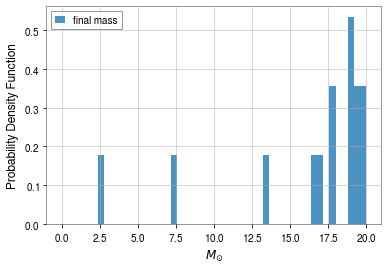

In [14]:
plt.hist(data['final_mass_source'], bins = 50, label='final mass', alpha=0.8, density=True, range = [0,20])
plt.xlabel(r'$M_{\odot}$')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

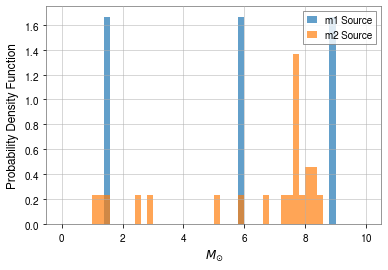

In [15]:
plt.hist(data['mass_1_source'], bins = 50, label='m1 Source', alpha=0.7, density=True, range = [0,10])
plt.hist(data['mass_2_source'], bins = 50, label='m2 Source', alpha=0.7, density=True, range = [0,10])
#plt.hist(chirp_mass, bins = 20, label='Chirp Mass', alpha=0.5, density=True)
plt.xlabel(r'$M_{\odot}$')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

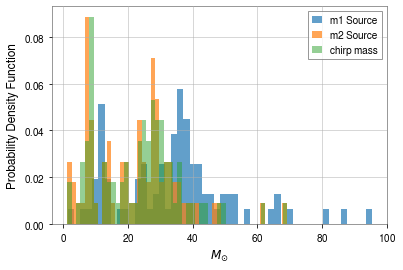

In [16]:
plt.hist(data['mass_1_source'], bins = 50, label='m1 Source', alpha=0.7, density=True)
plt.hist(data['mass_2_source'], bins = 50, label='m2 Source', alpha=0.7, density=True)
plt.hist(data['chirp_mass_source'], bins = 50, label='chirp mass', alpha=0.5, density=True)
plt.xlabel(r'$M_{\odot}$')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

In [17]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

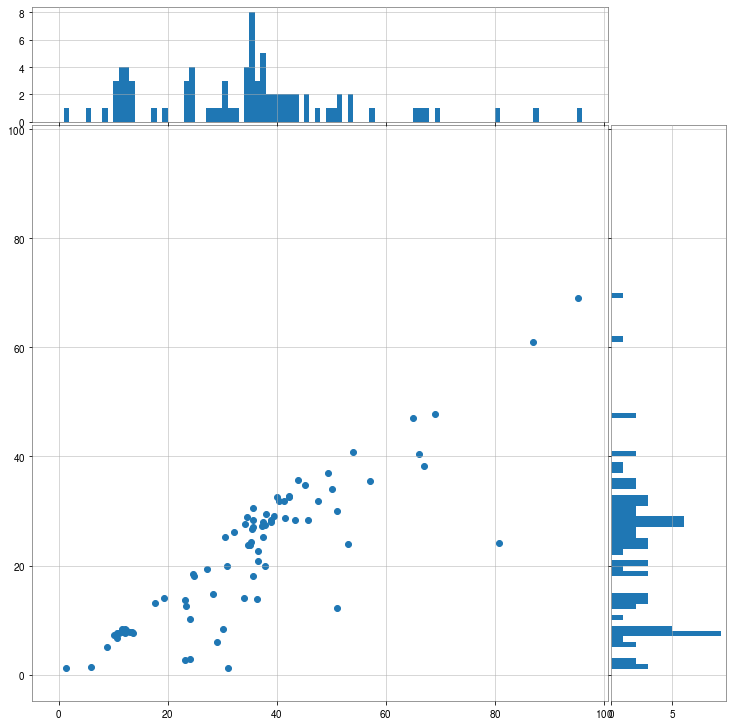

In [18]:
# definitions for the axes
left, width = 0.2, 1
bottom, height = 0.2, 1
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(data['mass_1_source'], data['mass_2_source'], ax, ax_histx, ax_histy)


plt.show()

In [19]:
def inverse(x):
    return x**(10)
def forward(x):
    return x**(1/10)

In [20]:
x = np.arange(len(data['mass_1_source']))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

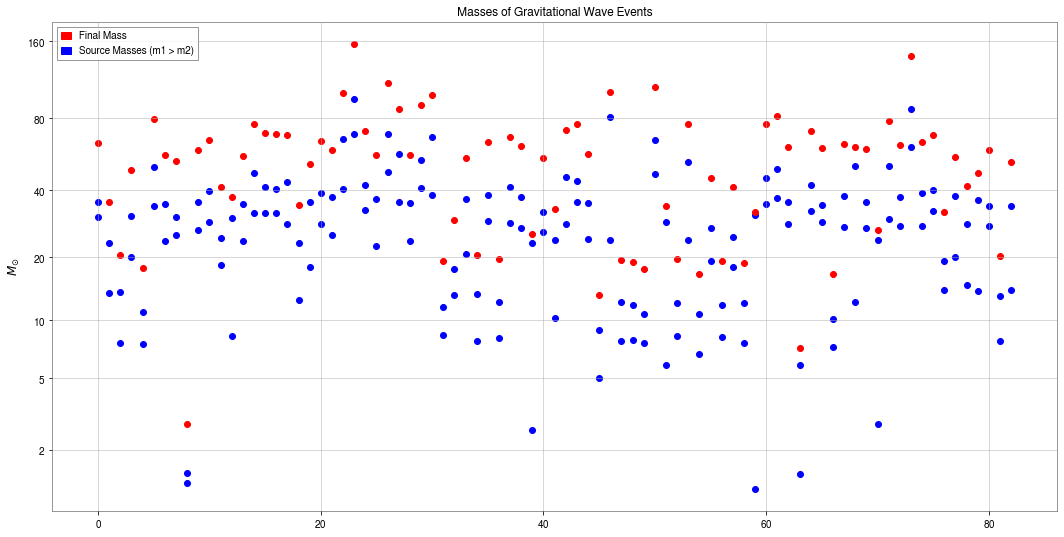

In [21]:
#Setting up the figure and labels/legend
fig, ax = plt.subplots(figsize=(18,9))
ax.set_ylabel(r'$M_{\odot}$')
ax.set_title('Masses of Gravitational Wave Events')
final_mass = mpatches.Patch(color='red', label='Final Mass')
source_mass = mpatches.Patch(color='blue', label = 'Source Masses (m1 > m2)')
ax.legend(handles=[final_mass, source_mass])

#Scaling the y axis to make it look better
ax.set_yscale('function', functions=(forward,inverse))
ax.set_yticks(np.array([0,2,5,10,20,40,80,160]))

#Plotting
ax.plot(x,data['mass_1_source'],'bo',x,data['mass_2_source'],'bo',x,data['final_mass_source'],'ro') #,x,data['total_mass_source'],'go')

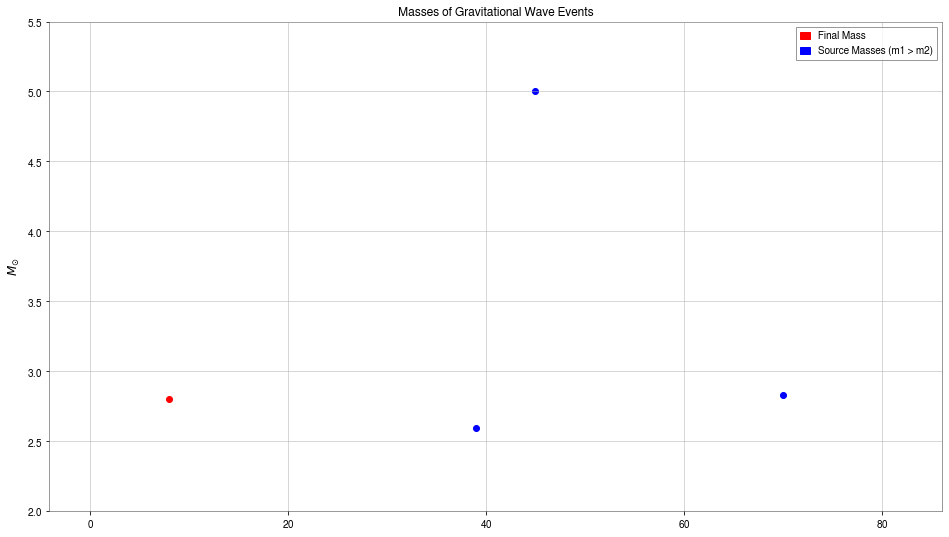

In [22]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_ylabel(r'$M_{\odot}$')
ax.set_title('Masses of Gravitational Wave Events')
final_mass = mpatches.Patch(color='red', label='Final Mass')
source_mass = mpatches.Patch(color='blue', label = 'Source Masses (m1 > m2)')
ax.legend(handles=[final_mass, source_mass])

ax.set_ylim([2,5.5])
ax.plot(x,data['mass_1_source'],'bo',x,data['mass_2_source'],'bo',x,data['final_mass_source'],'ro')

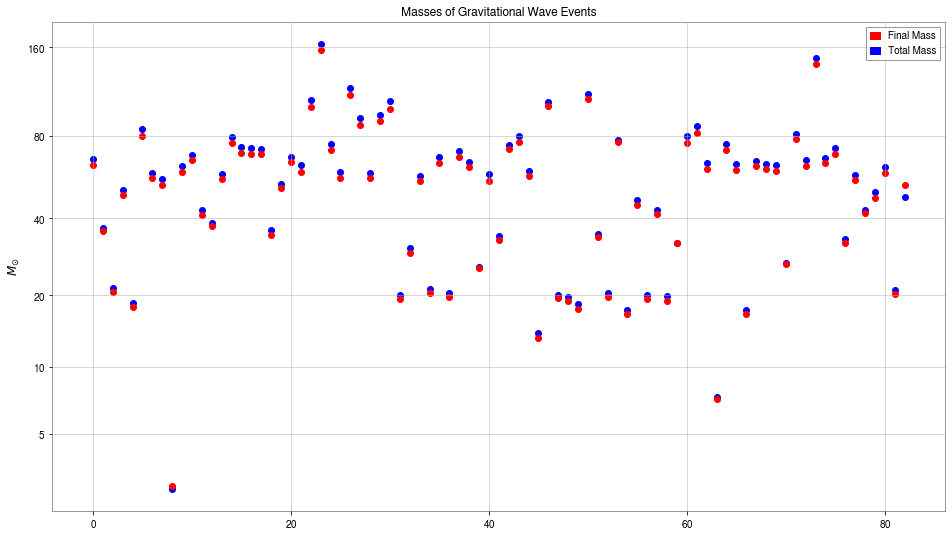

In [23]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_ylabel(r'$M_{\odot}$')
ax.set_title('Masses of Gravitational Wave Events')
final_mass = mpatches.Patch(color='red', label='Final Mass')
total_mass = mpatches.Patch(color='blue', label = 'Total Mass')
ax.legend(handles=[final_mass, total_mass])

#Scaling the y axis to make it look better
ax.set_yscale('function', functions=(forward,inverse))
ax.set_yticks(np.array([0,2,5,10,20,40,80,160]))

ax.plot(x,data['mass_1_source']+data['mass_2_source'],'bo',x,data['final_mass_source'],'ro')

In [79]:
df_sheet_2 = pd.read_excel('radiated_energy.xlsx', sheet_name=None)

radiated_energy = df_sheet_2['Sheet1']

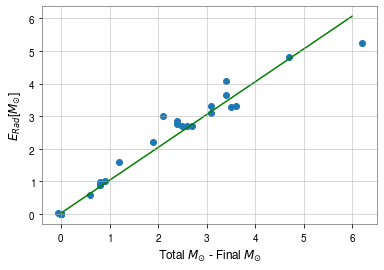

[1.00787623 0.02224978]


In [80]:
#create DataFrame
total_mass = radiated_energy['mass_1_source'] + radiated_energy['mass_2_source']
diff = total_mass - radiated_energy['final_mass_source']
x = diff
y = radiated_energy['radiated_energy']

#create scatterplot of x vs. y
plt.scatter(x, y)
plt.title("")
plt.xlabel("Total $M_{\odot}$ - Final $M_{\odot}$")
plt.ylabel("$E_{Rad}$[$M_{\odot}$]")


linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,7)
plt.plot(x_s,linear_model_fn(x_s),color="green")
plt.show()
print(linear_model)

In [78]:
y

0      3.1
1      1.6
2      1.0
3      2.2
4      0.9
      ... 
113    0.0
114    0.0
115    0.0
116    0.0
117    0.0
Name: radiated_energy, Length: 118, dtype: float64

,commonName,catalog,GPS,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,...,chirp_mass,chirp_mass_lower,chirp_mass_upper,redshift,redshift_lower,redshift_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper,radiated_energy
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,-3.1,4.7,30.6,-4.4,3.0,24.4,...,NaN,NaN,NaN,0.09,-0.03,0.03,63.1,-3.0,3.4,3.1
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,-5.5,14.9,13.6,-4.8,4.1,10.0,...,NaN,NaN,NaN,0.21,-0.09,0.09,35.6,-3.8,10.8,1.6
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,-3.2,8.8,7.7,-2.5,2.2,13.1,...,NaN,NaN,NaN,0.09,-0.04,0.04,20.5,-1.5,6.4,1.0
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,-5.6,7.3,20.0,-4.6,4.9,13.0,...,NaN,NaN,NaN,0.20,-0.08,0.08,48.9,-4.0,5.1,2.2
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,-1.7,5.5,7.6,-2.2,1.4,14.9,...,NaN,NaN,NaN,0.07,-0.02,0.02,17.8,-0.7,3.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
114,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
115,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
116,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0


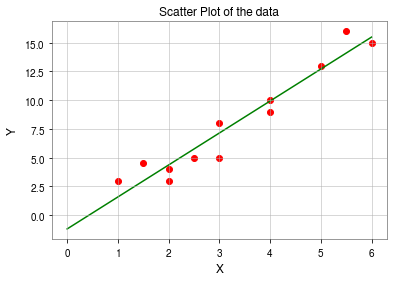

In [40]:
x=[1,2,3,1.5,4,2.5,6,4,3,5.5,5,2]
y=[3,4,8,4.5,10,5,15,9,5,16,13,3]

plt.scatter(x,y,color="red")
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,7)
plt.plot(x_s,linear_model_fn(x_s),color="green")

plt.show()

In [24]:
i = 0 
while i < len(data['mass_1_source']):
    m1 = data['mass_1_source'][i]
    m2 = data['mass_2_source'][i]
    total_mass = m1 + m2
    final_mass = data['final_mass_source'][i]
    if final_mass > total_mass:
        print(data['commonName'][i])
    i += 1

GW170817
GW200322_091133


In [ ]:
##GW200322_091133 has error range of +/- 30 solar masses

In [9]:
## GW2000115 (confident) --> 1263097407.7
## GW200105  (marginial) --> 1262276684
## GW191219  (confident) --> 1260808298.4
## GW170817  (confident) --> 1187008882.4

time_of_event = 1263097407.7

H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")


# Definite times in relation to the trigger time (time_of_event), duration and post_trigger_duration
post_trigger_duration = 2
duration = 4
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

L1_analysis_data = TimeSeries.fetch_open_data(
    "L1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
H1_analysis_data.plot()
plt.show()

In [67]:
H1.set_strain_data_from_gwpy_timeseries(H1_analysis_data)
L1.set_strain_data_from_gwpy_timeseries(L1_analysis_data)

In [ ]:
psd_duration = duration * 32
psd_start_time = analysis_start - psd_duration

H1_psd_data = TimeSeries.fetch_open_data(
    "H1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

L1_psd_data = TimeSeries.fetch_open_data(
    "L1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

In [ ]:
psd_alpha = 2 * H1.strain_data.roll_off / duration
H1_psd = H1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")
L1_psd = L1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")

In [ ]:
H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=H1_psd.value)
L1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=L1_psd.value)

In [ ]:
fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

In [ ]:
H1.maximum_frequency = 1024
L1.maximum_frequency = 1024

In [ ]:
fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

In [ ]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=30.0,maximum=32.5)
prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = 40